In [45]:
# Gather training and testing data
from common import get_baseline_data

nba = get_baseline_data('cleaned.csv')
X = nba[['MP', 'PTS', 'Age', 'games', 'games_started', 'PER', 'FTr', 'AST', 'STL', 'TRB', 'FT', '3P', 'FG']].values
y = nba[['inflationAdjSalary_log']].values
y = y/y.max()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


c:\Users\mmart\Programming\EECS545\project\EECS-545---Predicting-NBA-Player-s-Salary\common.py:7: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
c:\Users\mmart\Programming\EECS545\project\EECS-545---Predicting-NBA-Player-s-Salary\common.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nba['inflationAdjSalary'] = nba['inflationAdjSalary'].str.replace('$', '')
c:\Users\mmart\Programming\EECS545\project\EECS-545---Predicting-NBA-Player-s-Salary\common.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [46]:
# Fit the model
from sklearn.neural_network import MLPRegressor
import numpy as np

# MLPClassifier only classifies data as integers or strings, therefore, our problem is one of regression for the neural network
# Consequently I should use the mlp regressor
mlp = MLPRegressor(hidden_layer_sizes=(30,30,30), solver='adam', max_iter=500)
mlp.fit(X_train,y_train)


c:\Users\mmart\Programming\EECS545\project\venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(hidden_layer_sizes=(30, 30, 30), max_iter=500)

In [47]:
# Evaluate the model
import numpy as np
from sklearn.metrics import mean_squared_error
predict_test = mlp.predict(X_test)
test_set_rsquared = mlp.score(X_test, y_test)
test_set_rmse = np.sqrt(mean_squared_error(predict_test, y_test))
print('R_squared value: ', test_set_rsquared) # Variances are not nicely correlated
print('RMSE: ', test_set_rmse) # Fairly good at data prediction


R_squared value:  -23.338162792126916
RMSE:  0.3132898598636519


In [61]:
# TSNE (t-distributed stochastic neighbor embedding) evaluation to reduce the dimensions of the data
# Will compute a transform for our data that will convert from 13 dimensions to 2 dimensions so that we can better visualize it
# PCA is linear dimensionality reduction, while T-SNE is nonlinear reduction
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
tsne_results = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=30).fit_transform(X)


# Base_cleaned and external_cleaned are the only ones that matter

This appears to be a good paper explaining what information can be extracted from t-SNE plots
https://distill.pub/2016/misread-tsne/


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

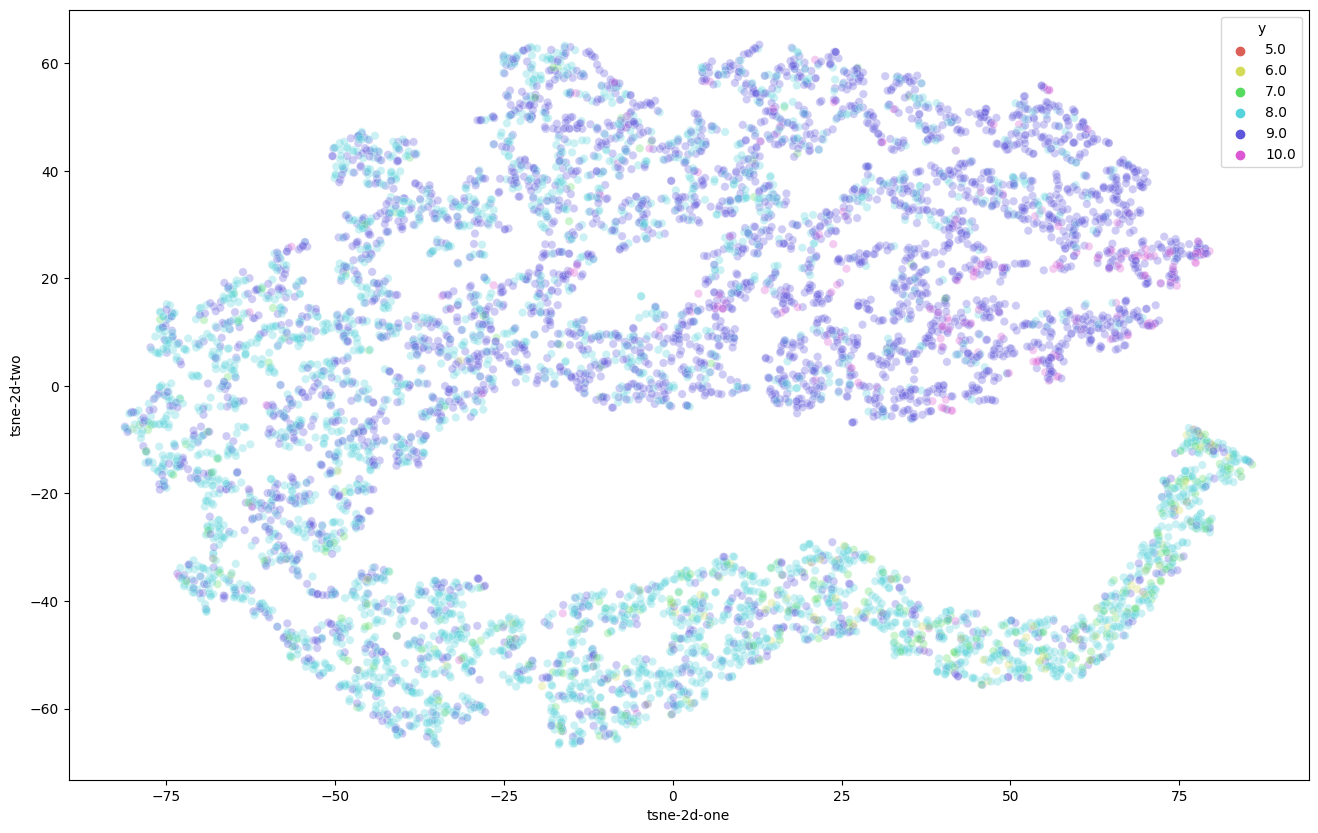

In [62]:
# Plot visualizing all the data across 2 dimensions
df_subset = {}
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
df_subset['y'] = np.rint(y[:,0] * 10)

plt.figure(figsize=(16,10))
import seaborn as sns
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full",
    alpha=0.3
)

In [63]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 

<Axes: xlabel='pca-one', ylabel='pca-two'>

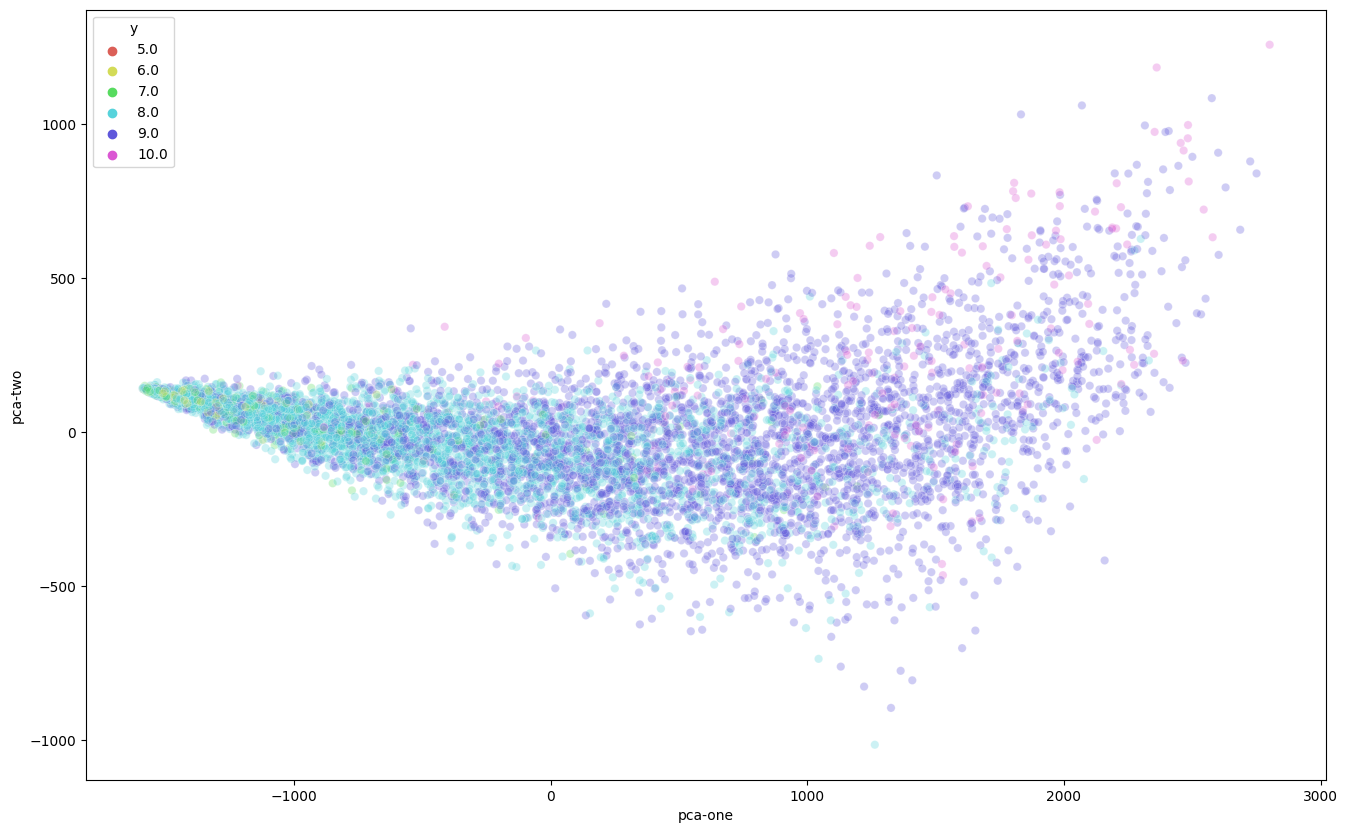

In [65]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 6),
    data=df_subset,
    legend="full",
    alpha=0.3
)

The way that I would interpret these two plots is that it seems that our data has one primary principle component along which values between 0.8 and 0.9 are clearly separable, but this is not necessarily the case along other components